In [1]:
import numpy as np  
import numpy.polynomial.legendre as npl
import sympy as sp
import matplotlib.pyplot as plt
from scipy.special import legendre
from scipy.interpolate import lagrange
from math import exp

In [2]:
def Transformation(nodes, weight,a,b):
    nodes=(b-a)/2*nodes+(a+b)/2
    weight=(b-a)/2 *weight
    return (nodes,weight)

In [3]:
def chop(lista):
    for i in range(len(lista)):
        if(abs(lista[i])<(10**(-10))):
            lista[i]=0
    return lista

In [4]:
class Cuadrature:
    def __init__(self,nodes=None,weight=None):
        if(list(nodes)!=None):
                self.nodes=nodes
        if(list(weight)!=None):
                self.weight=weight
        
    def getNodes(self):
        return self.nodes
    def getWeight(self):
        return self.weight
    def getNumPoints(self):
        return len(self.nodes)
    
    def Integrate(self,f):
        return self.Integrate_List(f(np.array(self.nodes)))
    
    def Integrate_List(self,lista):
        if (len(lista)==len(self.weight)):
            return np.array(lista).dot(np.array(self.weight))
        else:
            raise Exception("No has metido correctamente la lista")

In [5]:
class Lobato(Cuadrature):
    def __init__(self, num_points,a,b):
        aux=[-1,*sorted(list(legendre(num_points).deriv().r)),1]
        Cuadrature.__init__(self, nodes=np.array(aux), weight=np.array(2/(num_points*(num_points+1)*(legendre(num_points)(aux))**2)))
        self.nodes,self.weight=Transformation(self.nodes, self.weight, a, b)
    def __str__(self):
        return "Nodos: %s \nPesos: %s " %(self.nodes,self.weight)

In [6]:
class Legendre(Cuadrature):
    def __init__(self,num_points,a,b):
        Cuadrature.__init__(self,nodes=npl.leggauss(num_points)[0], weight=npl.leggauss(num_points)[1]) 
        self.nodes,self.weight=Transformation(self.nodes, self.weight, a, b)
    def __str__(self):
        return "Nodos: %s \nPesos: %s " %(self.nodes,self.weight)

In [7]:
class Trapecio_Compuesto(Cuadrature): #están considerados los extremos(-1,1)
    def __init__(self,num_points,a,b):
        Cuadrature.__init__(self, nodes=np.array([*np.arange(-1,1,float(2/num_points)).tolist(),1]), weight=np.array([2/(2*num_points),*[2/num_points]*(num_points-1),2/(2*num_points)]))
        self.nodes,self.weight=Transformation(self.nodes, self.weight, a, b)
    def __str__(self):
        return "Nodos: %s \nPesos: %s " %(self.nodes,self.weight)

Hacemos interpolación en vez de continuar con phi

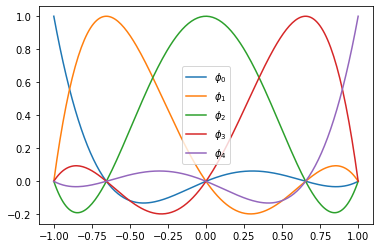

In [8]:
N=4
x = sp.symbols('x')
Ln = lambda x:chop(legendre(4))(x)
Lnp= lambda x:chop(legendre(4)).deriv()(x)
xvals = chop(Lobato(N,-1,1).getNodes())

phi0=lambda x:lagrange(xvals,[1,0,0,0,0])(x)
difphi0=lambda x: lagrange(xvals,[1,0,0,0,0]).deriv()(x)
                                                                                    
phi1=lambda x:lagrange(xvals,[0,1,0,0,0])(x)
difphi1=lambda x: lagrange(xvals,[0,1,0,0,0]).deriv()(x)

phi2=lambda x:lagrange(xvals,[0,0,1,0,0])(x)
difphi2=lambda x: lagrange(xvals,[0,0,1,0,0]).deriv()(x)

phi3=lambda x:lagrange(xvals,[0,0,0,1,0])(x)
difphi3=lambda x: lagrange(xvals,[0,0,0,1,0]).deriv()(x)

phi4=lambda x:lagrange(xvals,[0,0,0,0,1])(x)
difphi4=lambda x: lagrange(xvals,[0,0,0,0,1]).deriv()(x)

xval=np.linspace(-1,1,200)
plt.plot(xval,phi0(xval),label="$\phi_0$")
plt.plot(xval,phi1(xval),label="$\phi_1$")
plt.plot(xval,phi2(xval),label="$\phi_2$")
plt.plot(xval,phi3(xval),label="$\phi_3$")
plt.plot(xval,phi4(xval),label="$\phi_4$")
plt.legend()

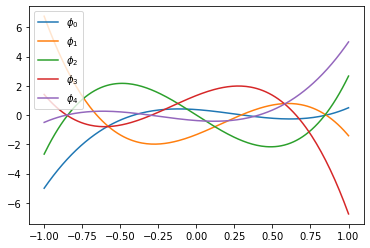

In [9]:
xval=np.linspace(-1,1,200)
plt.plot(xval,difphi0(xval),label="$\phi_0$")
plt.plot(xval,difphi1(xval),label="$\phi_1$")
plt.plot(xval,difphi2(xval),label="$\phi_2$")
plt.plot(xval,difphi3(xval),label="$\phi_3$")
plt.plot(xval,difphi4(xval),label="$\phi_4$")
plt.legend()

Hacer vector con phi y difphi para tener un código más corto

In [10]:
def Matriz_Local_bonita(m,p,Nq,num_interval): #p siempre será 4 en nuestra actividad
    
    intervals=np.linspace(-1,1,m+1)
    A=np.zeros((p+1, p+1))
    a=intervals[num_interval-1]
    b=intervals[num_interval]
    xvals2 = chop(Lobato(Nq-1,-1,1).getNodes())
    
    phi=[phi0,phi1,phi2,phi3,phi4]
    difphi=[difphi0,difphi1,difphi2,difphi3,difphi4]
  
    for i in range(0,5):
        for j in range(0,5):
            A[i][j]=Lobato(Nq-1,a,b).Integrate_List(difphi[i](xvals2)*difphi[j](xvals2))
    
    return A*m**2

## Tengo que investigar porque al multiplicar por m$^2$ siendo m el nº de intervalos si funciona correctamente y representa la gráfica.

In [11]:
def Vector_Ind_bonita(m,p,Nq,num_interval,f): #p siempre será 4 en nuestra actividad
    
    intervals=np.linspace(-1,1,m+1)
    A=np.zeros(p+1)
    a=intervals[num_interval-1]
    b=intervals[num_interval]
     #xvals2=np.linspace(a,b,Nq)
    xvals2 = chop(Lobato(Nq-1,-1,1).getNodes())
    xvals3 = chop(Lobato(Nq-1,a,b).getNodes())
    
    phi=[phi0,phi1,phi2,phi3,phi4]
    difphi=[difphi0,difphi1,difphi2,difphi3,difphi4]

    for i in range(0,5):
            A[i]=Lobato(Nq-1,a,b).Integrate_List(f(xvals3)*phi[i](xvals2))  
        
    return A

Al hacer la matriz local la incorporamos dentro de la global y luego al siguiente intervalo.

In [12]:
def Matriz_Global(m,p,Nq,f):#m es nº de intervalos
    
    AG=np.zeros((4*m+1, 4*m+1))
    BG=np.zeros(4*m+1)
    for k in range(0,m):
        A=Matriz_Local_bonita(m,p,Nq,k+1)
        B=Vector_Ind_bonita(m,p,Nq,k+1,f)
        for i in range(0,p+1):
            BG[k*p+i]=BG[k*p+i]+B[i]
            for j in range(0,p+1):
                AG[k*p+i][k*p+j] = AG[k*p+i][k*p+j] + A[i][j]
                #print("int",k+1,"k*p+i:",k*p+i," k*p+j:",k*p+j," k,i,j",k,i,j," sol:",AG[k*p+i][k*p+j] )
    return (AG,BG)

In [13]:
def Solucion(N_vals, Nq, f, cond1, cond2):
    AG,BG=Matriz_Global(N_vals,4,Nq,f) 

    AG[0][0]=10**30
    BG[0]=cond1*10**30
    AG[len(AG)-1][len(AG)-1]=10**30
    BG[len(BG)-1]=cond2*10**30

    return np.linalg.solve(AG,BG) 

# $-u''=f$

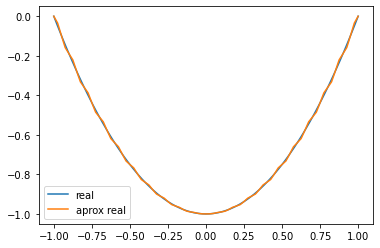

In [20]:
f= lambda x: -2
real = lambda x: x**2-1

N_vals=20 #Num intervalos
Nq=20 #nodos de cuadratura 
cond1=cond2=0
X = Solucion(N_vals, Nq, f, cond1, cond2)

valores=np.linspace(-1,1,101)
plt.plot(valores,real(valores),label="real")
plt.plot(np.linspace(-1,1,len(X)),X,label="aprox real")
plt.legend()

In [25]:
X2=np.zeros((len(X),len(X)))
for i in range(0,len(X)):
    for j in range(0,len(X)):
        X2[i][j]=X[i]*X[j]
print(X2)

[[3.96010000e-60 6.81305807e-32 1.94025000e-31 ... 1.94025000e-31
  6.81305807e-32 3.96010000e-60]
 [6.81305807e-32 1.17213606e-03 3.33805609e-03 ... 3.33805609e-03
  1.17213606e-03 6.81305807e-32]
 [1.94025000e-31 3.33805609e-03 9.50625000e-03 ... 9.50625000e-03
  3.33805609e-03 1.94025000e-31]
 ...
 [1.94025000e-31 3.33805609e-03 9.50625000e-03 ... 9.50625000e-03
  3.33805609e-03 1.94025000e-31]
 [6.81305807e-32 1.17213606e-03 3.33805609e-03 ... 3.33805609e-03
  1.17213606e-03 6.81305807e-32]
 [3.96010000e-60 6.81305807e-32 1.94025000e-31 ... 1.94025000e-31
  6.81305807e-32 3.96010000e-60]]


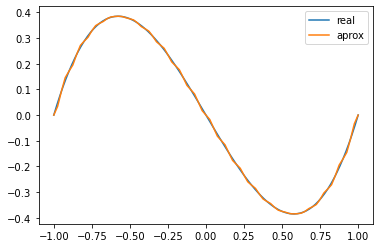

In [15]:
f= lambda x:-6*x
real= lambda x: x*(x+1)*(x-1) 

N_vals=20 #Num intervalos
Nq=20 #nodos de cuadratura 
cond1=cond2=0
X = Solucion(N_vals, Nq, f, cond1, cond2)

valores=np.linspace(-1,1,101)
plt.plot(valores,real(valores),label="real")
plt.plot(np.linspace(-1,1,len(X)),X,label="aprox")
plt.legend()

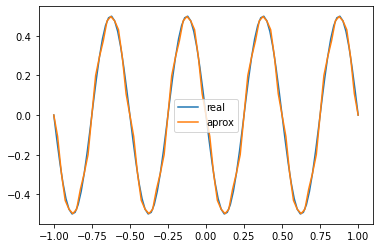

In [16]:
f= lambda x: -16*np.pi**2*np.cos(2*np.pi*x)*np.sin(2*np.pi*x)
real = lambda x: -np.sin(2*np.pi*x)*np.cos(2*np.pi*x)

N_vals=20 #Num intervalos
Nq=20 #nodos de cuadratura 
cond1=cond2=0
X = Solucion(N_vals, Nq, f, cond1, cond2)

valores=np.linspace(-1,1,101)
plt.plot(valores,real(valores),label="real")
plt.plot(np.linspace(-1,1,len(X)),X,label="aprox")
plt.legend()

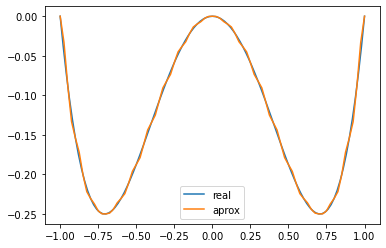

In [17]:
f=lambda x:2-12*x**2
real = lambda x:-x**2*(1 - x**2)

N_vals=20 #Num intervalos
Nq=20 #nodos de cuadratura 
cond1=cond2=0
X = Solucion(N_vals, Nq, f, cond1, cond2)

valores=np.linspace(-1,1,101)
plt.plot(valores,real(valores),label="real")
plt.plot(np.linspace(-1,1,len(X)),X,label="aprox")
plt.legend()

Ejemplos cuyas condiciones de contorno no son 0

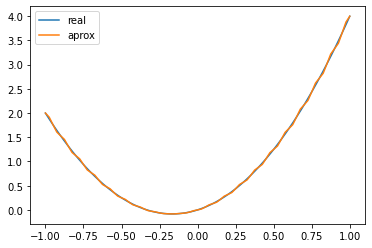

In [18]:
f= lambda x: -6
real = lambda x: 3*x**2+x

N_vals=20 #Num intervalos
Nq=20 #nodos de cuadratura 
cond1=2
cond2=4
X = Solucion(N_vals, Nq, f, cond1, cond2)

valores=np.linspace(-1,1,101)
plt.plot(valores,real(valores),label="real")
plt.plot(np.linspace(-1,1,len(X)),X,label="aprox")
plt.legend()

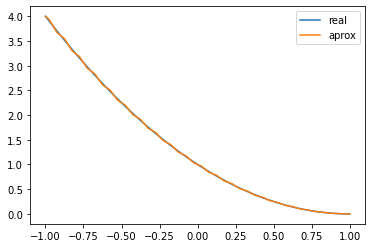

In [19]:
f= lambda x: -2
real = lambda x: (x-1)**2

N_vals=20 #Num intervalos
Nq=20 #nodos de cuadratura 
cond1=4
cond2=0
X = Solucion(N_vals, Nq, f, cond1, cond2)

valores=np.linspace(-1,1,101)
plt.plot(valores,real(valores),label="real")
plt.plot(np.linspace(-1,1,len(X)),X,label="aprox")
plt.legend()

Forzar las condiciones de contorno Dirchlet especifican el valor de la frontera u(a)=u_a
La primera fila, 1000000, ultima 00001
Tambien sirve poner el primero por M=10**(30) grande, "bloquear los grados de libertad de la frontera" en la matriz global 
y en el termino independiente

Hay otras que se llaman naturales, Neumann homogenea nos dan u'(a)=u_a